#Objective:

**User Engagement Analysis:**
1. Calculate the total number of messages sent by each user to gauge their level of participation.
2. Identify the most active users in terms of message count and engagement.

**Emoji Usage:**

Analyze emoji usage to understand user emotions and reactions.

**Word Cloud and Keyword Analysis:**

1. Create a word cloud to visualize the most frequently used words or phrases in the chat.
2. Identify common keywords to understand the main topics of discussion.

**Message Frequency Analysis:**

1. Analyze message frequency by time of day, day of the week, or month to identify peak activity periods.
2. Present data in graphs to visually represent user activity patterns.

**Conversation Length Analysis:**

1. Analyze the average length of conversations to understand the depth of discussions.
2. Compare conversation lengths on different topics.

**Network Analysis:**

1. Build a network graph of users based on interactions (replies, mentions) to understand group dynamics.
2. Identify influential users within the network.

**Sentiment Analysis:**

1. Perform sentiment analysis on messages to gauge the overall mood of the group.

In [1]:
!pip install emoji

In [2]:
!pip install wordcloud

In [3]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
!pip install langdetect

In [5]:
# imports

import re
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import emoji
from collections import Counter, defaultdict
from nltk.sentiment import SentimentIntensityAnalyzer
from langdetect import detect



### loading and basic cleaning

In [6]:
input_file_path = '_chat.txt'  # Replace with the path to your input file
output_file_path = 'chat_without_u200e.txt'  # Replace with the desired output file path

with open(input_file_path, 'r', encoding='utf-8') as file:
    content = file.read()

# Remove the [U+200E] character from the content
content_without_u200e = content.replace('\u200E', '')

with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write(content_without_u200e)

print(f"Removed [U+200E] character and saved to {output_file_path}")

Removed [U+200E] character and saved to chat_without_u200e.txt


In [7]:
output_M_path="chat1.txt"
def check_line(line):
    pattern = r'^\s*\[\d{1,2}/\d{1,2}/\d{4}, \d{1,2}:\d{2}:\d{2}\]' #pattern
    return re.match(pattern, line) is not None


def has_special_characters(line):
    for char in line:
        if ord(char) < 32 or ord(char) > 127:
            return True
    return False

file_path = 'chat_without_u200e.txt'

merged_lines = []
current_line = ""

with open(file_path, 'r', encoding='utf-8') as file:
    for line_number, line in enumerate(file, start=1):
        line = line.strip()

        if check_line(line):
            #print(line,"--Valid")
            if current_line:
                merged_lines.append(current_line)
            current_line = line
        else:
            #print(line,"--InValid")
            current_line += " " + line

if current_line:
    merged_lines.append(current_line)

with open(output_M_path, 'w', encoding='utf-8') as output_file:
    for idx, merged_line in enumerate(merged_lines, start=1):
        output_file.write(f"{merged_line}\n")

In [8]:
file_path = 'chat1.txt'  # Use chat1.txt file

# Read the data from the file
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.read()

# Extract data from the lines using regular expressions
pattern = r'\[(.*?)\] (.*?): (.*?)\n'
matches = re.findall(pattern, data)

# Create lists for each column
chat_timestamps = [match[0] for match in matches]
users = [match[1] for match in matches]
messages = [match[2] for match in matches]

# Create a Pandas DataFrame
columns = ['chat_timestamp', 'user', 'message']
df = pd.DataFrame(list(zip(chat_timestamps, users, messages)), columns=columns)


In [9]:
df.shape

(11004, 3)

## User Engagement Analysis:

### Calculate the total number of messages sent by each user to gauge their level of participation.

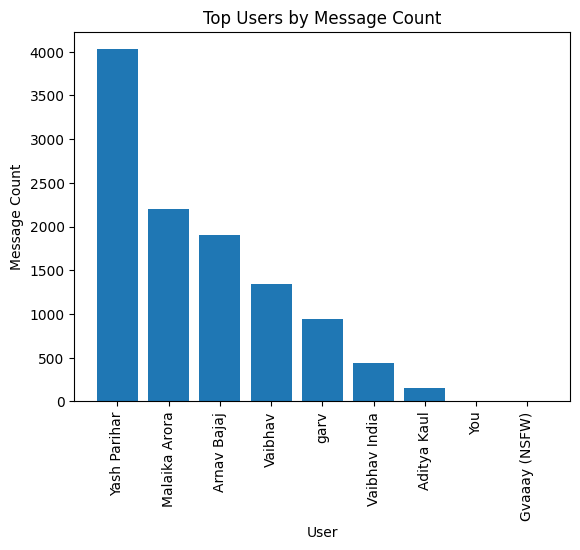

In [10]:
# Generate a bar plot
x = df['user'].value_counts()
user_names = x.index
msg_count = x.values

plt.bar(user_names, msg_count)
plt.xticks(rotation='vertical')
plt.xlabel("User")
plt.ylabel("Message Count")
plt.title("Top Users by Message Count")
plt.yticks(range(0, max(msg_count) + 1, 500))  # Set y-axis ticks in intervals of 100
plt.show()

## Emoji Usage.

In [11]:

emojis_counter = Counter()
user_emoticons = defaultdict(list)

for user, message in zip(df['user'], df['message']):
    message_emojis = [c for c in message if c in emoji.EMOJI_DATA]
    emojis_counter.update(message_emojis)

    if message_emojis:
        user_emoticons[user].extend(message_emojis)

emojis = list(emojis_counter.keys())
emojis_count = list(emojis_counter.values())

# Print emojis and their counts
for emoji, count in emojis_counter.items():
    print(f"{emoji}:", count)

😂: 815
💯: 100
🤙: 6
🖖: 2
😒: 33
😓: 3
😍: 8
😎: 13
🤷: 17
🏻: 39
♂: 21
🤣: 46
🥶: 1
💀: 32
😢: 11
👍: 7
🍑: 23
🎂: 2
🍻: 3
🤘: 42
❤: 14
😲: 1
🥲: 6
😬: 3
💪: 4
🍃: 1
🍁: 1
🍂: 1
🤮: 1
🙏: 3
🙃: 2
😆: 1
😁: 5
✌: 15
😇: 1
👀: 4
🥹: 10
🤦: 4
🥰: 1
💗: 1
☺: 1
✨: 3
🔥: 21
🤯: 1
😕: 1
🫣: 2
🤓: 2
💙: 8
😳: 6
🤡: 1
☠: 5
🫶: 1
🥸: 1
🤨: 4
😏: 14
😅: 5
👻: 1
🏳: 6
🌈: 6
🤪: 1
🤟: 3
😰: 1
🆒: 6
🆗: 1
😭: 2
🙄: 2
🦻: 1
🙋: 2
🌿: 1
🍀: 1
☘: 1
😪: 4
💕: 3
🐐: 1
👆: 6
😮: 1
💨: 1
🔴: 1
😞: 1
😛: 1
🤞: 1
🔪: 1
👑: 1
😱: 2
💩: 1
🍟: 1


In [12]:
# Print user-wise total emoticon counts
for user, total_emoticons in user_emoticons.items():
    print(f"{user}:", len(total_emoticons))

Malaika Arora: 842
Yash Parihar: 144
Arnav Bajaj: 213
Vaibhav India: 20
Vaibhav: 58
garv: 101
Aditya Kaul: 62


## Word Cloud and Keyword Analysis:

### Create a word cloud to visualize the most frequently used words or phrases in the chat.

In [13]:
df_temp = df.copy()
# Remove entries containing "omitted" from the message column
df_temp = df_temp[~df_temp['message'].str.contains('omitted', case=False)]

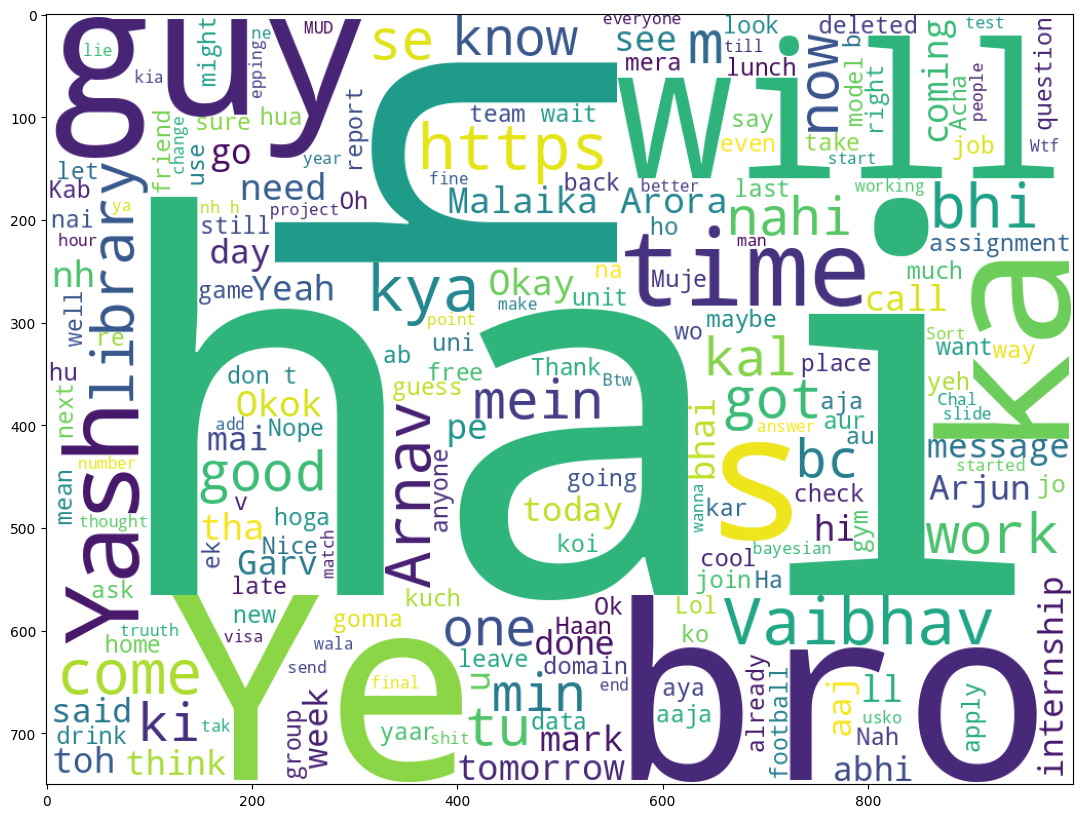

In [14]:
from wordcloud import WordCloud
plt.figure(figsize=(20, 10))
wc = WordCloud(width=1000,height=750,min_font_size=10,background_color='white')
cloud = wc.generate(df_temp['message'].str.cat(sep=" "))
plt.imshow(cloud)

## Message Frequency Analysis:

### Analyze message frequency by time of day, day of the week, or month to identify peak activity periods.

In [15]:
df_plot= df.copy()

In [16]:
# Assuming your DataFrame is named 'df_plot'
# Convert 'chat_timestamp' to datetime
df_plot['chat_timestamp'] = pd.to_datetime(df_plot['chat_timestamp'], dayfirst=True)

# Extract year, month, day of the week from 'chat_timestamp'
df_plot['year'] = df_plot['chat_timestamp'].dt.year
df_plot['month'] = df_plot['chat_timestamp'].dt.month
df_plot['day_of_week'] = df_plot['chat_timestamp'].dt.day_name()
df_plot['hour'] = df_plot['chat_timestamp'].dt.hour


# Group by year, month, day, and hour
date_counts = df_plot.groupby(['year', 'chat_timestamp'])['message'].count().unstack()
month_counts = df_plot.groupby(['year', 'month'])['message'].count().unstack()
day_of_week_counts = df_plot.groupby(['year', 'day_of_week'])['message'].count().unstack()
hourly_counts = df_plot.groupby(['year', 'hour'])['message'].count().unstack()



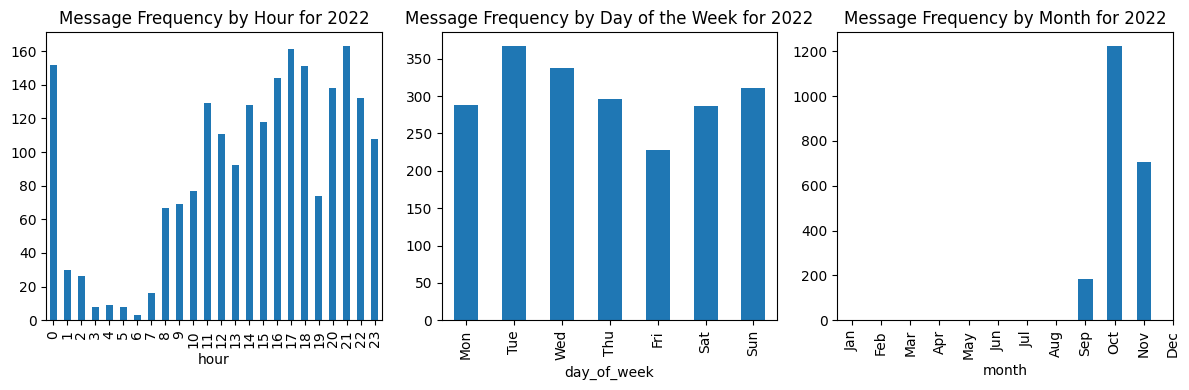

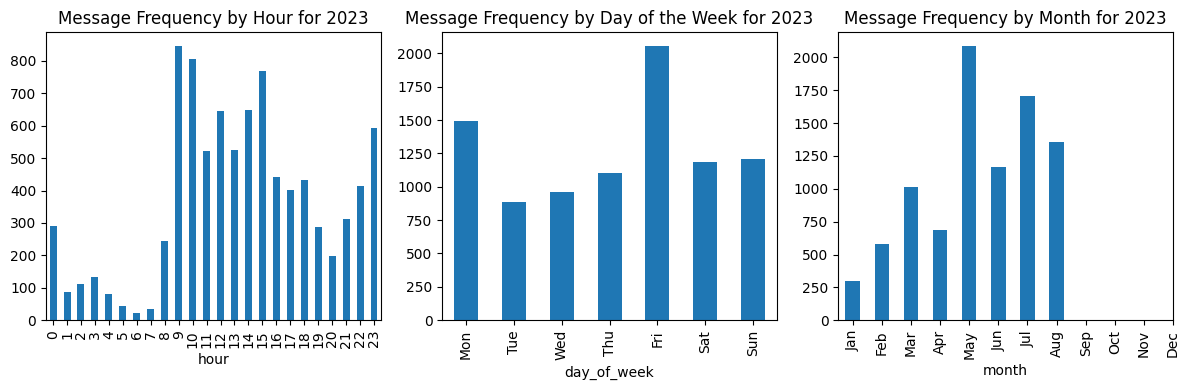

In [17]:
# Create subplots for each year
years = df_plot['year'].unique()

for year in years:
    plt.figure(figsize=(12, 4))

    plt.subplot(131)
    hourly_counts.loc[year].plot(kind='bar')
    plt.title(f'Message Frequency by Hour for {year}')

    plt.subplot(132)
    day_of_week_counts.loc[year].plot(kind='bar')
    plt.title(f'Message Frequency by Day of the Week for {year}')
    plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

    plt.subplot(133)
    month_counts.loc[year].plot(kind='bar')
    plt.title(f'Message Frequency by Month for {year}')
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    plt.tight_layout()
    plt.show()

## Conversation Length Analysis

In [18]:
# Calculate the length of each message
df_plot['message_length'] = df_plot['message'].str.len()

# Group by conversation (user and day) and calculate the average message length
avg_length_per_conversation = df_plot.groupby(['user', 'chat_timestamp', 'year', 'month', 'day_of_week'])['message_length'].mean().reset_index()

# Group by year and calculate the overall average message length
avg_length_per_year = avg_length_per_conversation.groupby('year')['message_length'].mean()

# Print the average message length per year
print(avg_length_per_year)

year
2022    23.818487
2023    24.417525
Name: message_length, dtype: float64


## Network Analysis:

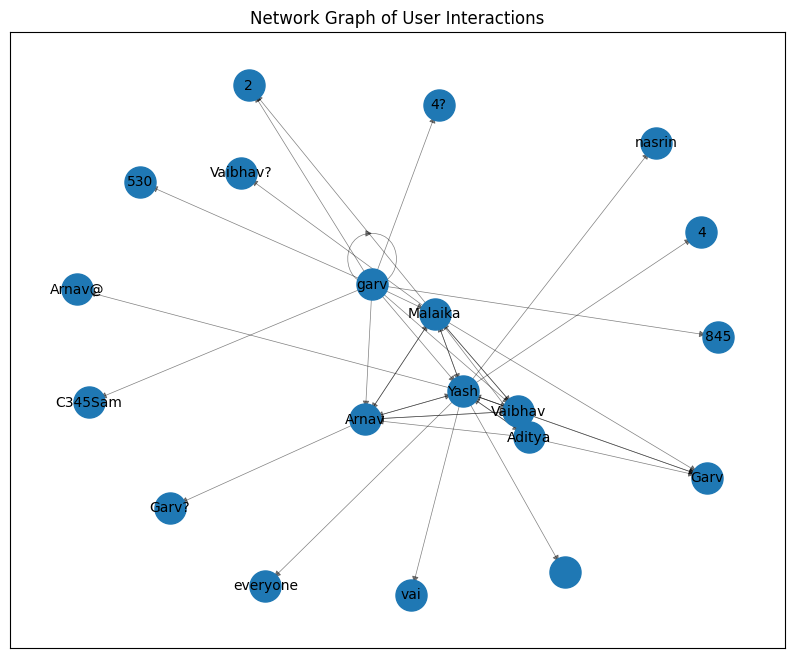

Top Influential Users based on In-Degree Centrality:
Vaibhav: 0.2632
Yash: 0.2632
Arnav: 0.2632
Malaika: 0.2105
Garv: 0.2105
Aditya: 0.1579
2: 0.1053
nasrin: 0.0526
Arnav@: 0.0526
vai: 0.0526

Top Influential Users based on Out-Degree Centrality:
Yash: 0.5789
garv: 0.5263
Malaika: 0.3684
Vaibhav: 0.2632
Arnav: 0.2105
Aditya: 0.2105
nasrin: 0.0000
Arnav@: 0.0000
vai: 0.0000
845: 0.0000


In [19]:
# Extract usernames from messages
df_plot['user'] = df_plot['user'].str.split().str[0]

# Create a directed graph
G = nx.DiGraph()

# Iterate through DataFrame to add edges (interactions) between users
for index, row in df_plot.iterrows():
    sender = row['user']
    message = row['message']
    mentions = [word for word in message.split() if word.startswith('@')]

    if mentions:
        for mention in mentions:
            mentioned_user = mention[1:]  # Remove '@' symbol
            G.add_edge(sender, mentioned_user)

# Plot the network graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
plt.title('Network Graph of User Interactions')
plt.show()

# Calculate centrality measures to identify influential users
in_degree_centrality = nx.in_degree_centrality(G)
out_degree_centrality = nx.out_degree_centrality(G)

# Print the most influential users based on in-degree centrality
print("Top Influential Users based on In-Degree Centrality:")
for user, centrality in sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{user}: {centrality:.4f}")

# Print the most influential users based on out-degree centrality
print("\nTop Influential Users based on Out-Degree Centrality:")
for user, centrality in sorted(out_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{user}: {centrality:.4f}")


In this group of friends who like to talk to each other. Some friends talk more, and some talk less. These numbers show us which friends are really good at talking and who others like to talk to the most.

Top Influential Users based on In-Degree Centrality:
These are the friends who get talked to a lot. For example, the first number 0.2600 means that one friend got talked to by 26% of the other friends. It's like saying approx 2 out of every 10 friends like to talk to this friend a lot.

Top Influential Users based on Out-Degree Centrality:
These are the friends who like to start conversations a lot. For example, the first number 0.5700 means that this friend likes to start conversations with 57% of the other friends. It's like saying almost half of the friends want to chat with this friend first.

So, these numbers help us know which friends are really popular in the group and who likes to talk the most to others. Just like in school, where some kids are really good at making friends and starting conversations, these numbers help us see which friends are the best at it in our group.

##Sentiment Analysis

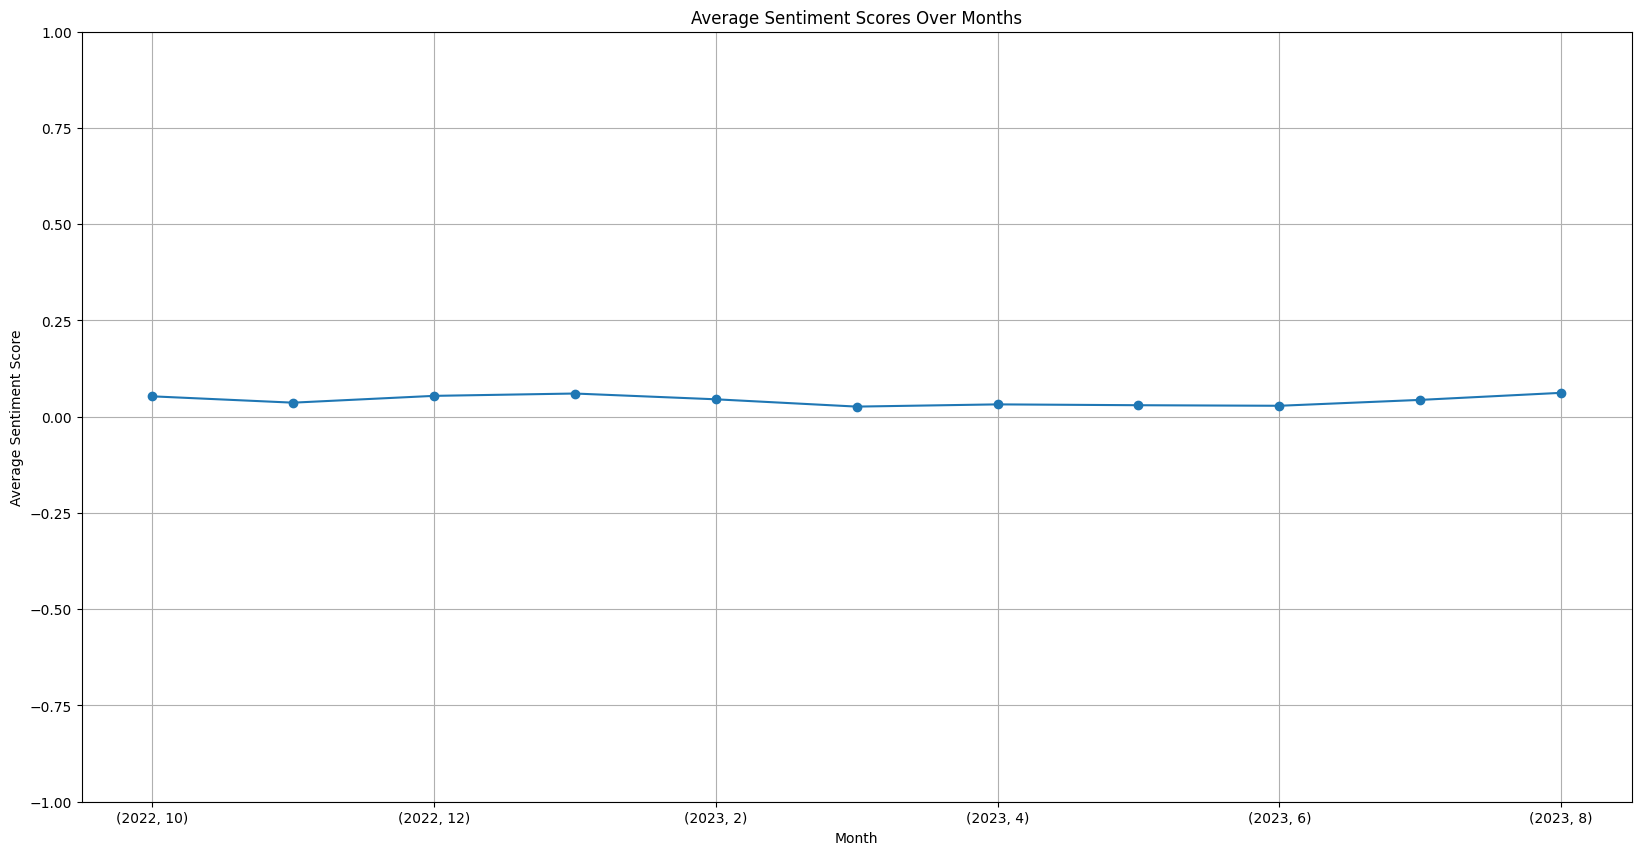

In [20]:
# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each message
df_plot['sentiment_score'] = df_plot['message'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Group data by year and month and calculate average sentiment score
df_plot['year'] = df_plot['chat_timestamp'].dt.year
df_plot['month'] = df_plot['chat_timestamp'].dt.month
monthly_sentiment = df_plot.groupby(['year', 'month'])['sentiment_score'].mean()

# Plot sentiment scores over months spanning years
plt.figure(figsize=(20, 10))
monthly_sentiment.plot(marker='o')
plt.title('Average Sentiment Scores Over Months')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.ylim(-1, 1)  # Set y-axis limits for sentiment score
plt.grid()
plt.show()
